In [1]:
camera=94706

In [2]:
import keras
import tensorflow as tf
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
#from keras.layers import BatchNormalization
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing



#Sampling Libraries
from imblearn.over_sampling import SMOTE 

#Imputation Libraries
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Data
from sklearn.datasets import load_boston

#Costant Value
from sklearn.feature_selection import VarianceThreshold

#Encoding Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


#Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing



#Sampling Libraries
from imblearn.over_sampling import SMOTE 

#Imputation Libraries
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Data
from sklearn.datasets import load_boston

#Costant Value
from sklearn.feature_selection import VarianceThreshold

#Encoding Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
import tensorflow as tf
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
#from keras.layers import BatchNormalization
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns


#Research Parameter Set

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My Drive/SRH Heidelberg/Case Study 1/Codes-Sasha/00-Data/thermal_images/94706

/content/drive/My Drive/SRH Heidelberg/Case Study 1/Codes-Sasha/00-Data/thermal_images/94706


In [6]:
faulty_data=np.load(f"all_faulty_{camera}.npy")
healthy_data=np.load(f"healthy_{camera}.npy")

In [7]:
#max= np.concatenate([faulty_data,healthy_data], axis=0).max()
#min= np.concatenate([faulty_data,healthy_data], axis=0).min()

In [8]:
max=healthy_data.max()
min=healthy_data.min()

In [9]:
healthy_data=(healthy_data-min)/(max-min)

In [10]:
max=faulty_data.max()
min=faulty_data.min()

In [11]:
faulty_data=(faulty_data-min)/(max-min)

In [12]:
np.random.shuffle(faulty_data)
np.random.shuffle(healthy_data)


In [13]:
index=faulty_data.shape[0]
X_test=healthy_data[:index]
X=healthy_data[index:]
X_train=X[:round(X.shape[0]*.8)]
X_val=X[round(X.shape[0]*.8):]
X_fehler_test=faulty_data
test_data = np.concatenate((X_test,X_fehler_test),axis = 0)

In [14]:
print(f"""shape of data:
X_train-->{X_train.shape[0]}
X_val-->{X_val.shape[0]}
X_test-->{X_test.shape[0]}
X_fehler_test-->{X_fehler_test.shape[0]}
test_data-->{test_data.shape[0]}""")

shape of data:
X_train-->927
X_val-->232
X_test-->954
X_fehler_test-->954
test_data-->1908


In [16]:
batch_size=32
niter=int(X_train.shape[0]/batch_size)

In [17]:
%cd /content/drive/My Drive/SRH Heidelberg/Case Study 1/Codes-Sasha/00-Data/thermal_images/94706/Report Data

/content/drive/My Drive/SRH Heidelberg/Case Study 1/Codes-Sasha/00-Data/thermal_images/94706/Report Data


In [18]:
height,width,channels=32,32,1

# Creating GE

In [19]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

# Encoder
x = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='conv_1', kernel_regularizer = 'l2')(input_layer)
x = layers.LeakyReLU(name='leaky_1')(x)

x = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='conv_2', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_1')(x)
x = layers.LeakyReLU(name='leaky_2')(x)


x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_3', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_2')(x)
x = layers.LeakyReLU(name='leaky_3')(x)


x = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_4', kernel_regularizer = 'l2')(x)
x = layers.BatchNormalization(name='norm_3')(x)
x = layers.LeakyReLU(name='leaky_4')(x)

x = layers.GlobalAveragePooling2D(name='g_encoder_output')(x)

g_e = keras.models.Model(inputs=input_layer, outputs=x)

# Creating GD or G

In [20]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

x = g_e(input_layer)

y = layers.Dense(width * width * 2, name='dense')(x) # 2 = 128 / 8 / 8
y = layers.Reshape((width//8, width//8, 128), name='de_reshape')(y)

y = layers.Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', name='deconv_1', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_1')(y)

y = layers.Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', name='deconv_2', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_2')(y)

y = layers.Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', name='deconv_3', kernel_regularizer = 'l2')(y)
y = layers.LeakyReLU(name='de_leaky_3')(y)

y = layers.Conv2DTranspose(channels, (1, 1), strides=(1,1), padding='same', name='decoder_deconv_output', kernel_regularizer = 'l2', activation='tanh')(y)

g = keras.models.Model(inputs=input_layer, outputs=y)

#Creating Second Encoder E

In [21]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

z = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='encoder_conv_1', kernel_regularizer = 'l2')(input_layer)
z = layers.LeakyReLU()(z)

z = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='encoder_conv_2', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_1')(z)
z = layers.LeakyReLU()(z)


z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='encoder_conv_3', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_2')(z)
z = layers.LeakyReLU()(z)

z = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='conv_41', kernel_regularizer = 'l2')(z)
z = layers.BatchNormalization(name='encoder_norm_3')(z)
z = layers.LeakyReLU()(z)

z = layers.GlobalAveragePooling2D(name='encoder_output')(z)

encoder = keras.models.Model(input_layer, z)

#Creating Discremenator

In [22]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

f = layers.Conv2D(32, (5,5), strides=(1,1), padding='same', name='f_conv_1', kernel_regularizer = 'l2')(input_layer)
f = layers.LeakyReLU(name='f_leaky_1')(f)

f = layers.Conv2D(64, (3,3), strides=(2,2), padding='same', name='f_conv_2', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_1')(f)
f = layers.LeakyReLU(name='f_leaky_2')(f)


f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_3', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_2')(f)
f = layers.LeakyReLU(name='f_leaky_3')(f)


f = layers.Conv2D(128, (3,3), strides=(2,2), padding='same', name='f_conv_4', kernel_regularizer = 'l2')(f)
f = layers.BatchNormalization(name='f_norm_3')(f)
f = layers.LeakyReLU(name='feature_output')(f)

feature_extractor = keras.models.Model(input_layer, f)

In [23]:
input_layer = layers.Input(name='input', shape=(height, width, channels))

f = feature_extractor(input_layer)

d = layers.GlobalAveragePooling2D(name='glb_avg')(f)
d = layers.Dense(1, activation='sigmoid', name='d_out')(d)
    
d = keras.models.Model(input_layer, d)
d.compile(optimizer='adam', loss='binary_crossentropy')

#Creating Losses

Ladv

In [24]:
class AdvLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AdvLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori_feature = feature_extractor(x[0])
        gan_feature = feature_extractor(x[1])
        return K.mean(K.square(ori_feature - K.mean(gan_feature, axis=0)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)

Lcon

In [25]:
class CntLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CntLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.abs(ori - gan))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)

Lenc

In [26]:
class EncLoss(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(EncLoss, self).__init__(**kwargs)

    def call(self, x, mask=None):
        ori = x[0]
        gan = x[1]
        return K.mean(K.square(g_e(ori) - encoder(gan)))

    def get_output_shape_for(self, input_shape):
        return (input_shape[0][0], 1)

Loss Combination

In [27]:
# model for training
input_layer = layers.Input(name='input', shape=(height, width, channels))
gan = g(input_layer) # g(x)

adv_loss = AdvLoss(name='adv_loss')([input_layer, gan])
cnt_loss = CntLoss(name='cnt_loss')([input_layer, gan])
enc_loss = EncLoss(name='enc_loss')([input_layer, gan])

gan_trainer = keras.models.Model(input_layer, [adv_loss, cnt_loss, enc_loss])

# loss function
def loss(yt, yp):
    return yp

losses = {
    'adv_loss': loss,
    'cnt_loss': loss,
    'enc_loss': loss,
}

lossWeights = {'cnt_loss': 50.0, 'adv_loss': 1.0, 'enc_loss': 1.0}

# compile
gan_trainer.compile(optimizer = 'adam', loss=losses, loss_weights=lossWeights)

#Training

In [28]:
def get_data_generator(data, batch_size=32):
    datalen = len(data)
    cnt = 0
    while True:
        idxes = np.arange(datalen)
        np.random.shuffle(idxes)
        cnt += 1
        for i in range(int(np.ceil(datalen/batch_size))):
            train_x = np.take(data, idxes[i*batch_size: (i+1) * batch_size], axis=0)
            y = np.ones(len(train_x))
            yield train_x, [y, y, y]

In [29]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)

In [30]:

train_data_generator = get_data_generator(X_train, batch_size)

for i in range(niter):
    
    ### get batch x, y ###
    x, y = train_data_generator.__next__()
        
    ### train disciminator ###
    d.trainable = True
        
    fake_x = g.predict(x)
        
    d_x = np.concatenate([x, fake_x], axis=0)
    d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)
        
    d.train_on_batch(d_x, d_y)

    ### train generator ###
    
    d.trainable = False        
    gan_trainer.train_on_batch(x, y)

In [31]:

train_data_generator = get_data_generator(X_train, batch_size)

for i in range(niter):
    
    ### get batch x, y ###
    x, y = train_data_generator.__next__()
        
    ### train disciminator ###
    d.trainable = True
        
    fake_x = g.predict(x)
        
    d_x = np.concatenate([x, fake_x], axis=0)
    d_y = np.concatenate([np.zeros(len(x)), np.ones(len(fake_x))], axis=0)
        
    d.train_on_batch(d_x, d_y)

    ### train generator ###
    
    d.trainable = False        
    gan_trainer.train_on_batch(x, y)

#Function calculating Anomaly Scores

In [32]:
def score_calc(data):
  encoded = g_e.predict(data)
  gan_x = g.predict(data)
  encoded_gan = g_e.predict(gan_x)
  score = np.sum(np.absolute(encoded - encoded_gan), axis=-1)
  score = (score - np.min(score)) / (np.max(score) - np.min(score)) # map to 0~1
  return score

In [33]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_fehler_test=X_fehler_test.reshape(X_fehler_test.shape[0],X_fehler_test.shape[1],X_fehler_test.shape[2],1)

In [34]:
train_scores=score_calc(X_train)
normal_scores=score_calc(X_test)
anomaly_scores=score_calc(X_fehler_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


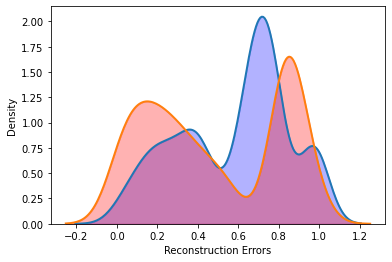

In [35]:
ax=sns.distplot(normal_scores, hist=False, kde=True, 
             bins=int(200),fit_kws={"color":"blue"},
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax=sns.distplot(anomaly_scores, hist=False, kde=True, 
             bins=int(200),fit_kws={"color":"red"}, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})


ax.set(xlabel='Reconstruction Errors', ylabel='Density')
l1 = ax.lines[0]
l2 = ax.lines[1]

x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="blue", alpha=0.3)
ax.fill_between(x2,y2, color="red", alpha=0.3)
plt.savefig(f'ganomaly_dist{camera}.png')
plt.show(block=False)

In [36]:
def create_dataset(normal_scores,anomally_scores):
  dataset=np.row_stack((np.column_stack((normal_scores,np.ones((normal_scores.shape[0],),dtype=np.int64))),np.column_stack((anomally_scores,np.zeros((anomally_scores.shape[0],),dtype=np.int64)))))
  df=pd.DataFrame(dataset,columns=['Scores','label'])
  df = df.sample(frac=1).reset_index(drop=True)
  X=df.drop("label",axis=1)
  y=df["label"]
  return df


In [37]:
df_scatter=create_dataset(np.array(train_scores),np.array(anomaly_scores))
df=create_dataset(np.array(normal_scores),np.array(anomaly_scores))

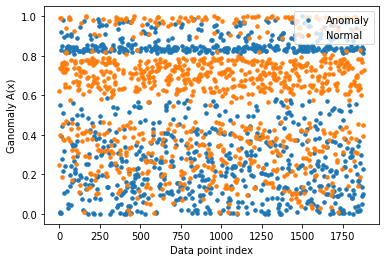

In [38]:
groups = df_scatter.groupby('label')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Scores, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 1 else "Anomaly")
ax.legend(loc='upper right')
plt.ylabel("Ganomaly A(x)")
plt.xlabel("Data point index")
plt.savefig(f'Ganomaly_scatter{camera}.png')
plt.show();

In [39]:
test_scores=df.Scores.to_numpy()
y_actual=df.label.to_numpy()
test_labels=df.label.to_numpy()

#Area under the curve (AUC) of the Receiver Operating Characteristic (ROC)

In [40]:
class Classifier:
  def classify(self,test_scores,threshold):
    if test_scores < threshold:
      pred_label = 1
    else:
       pred_label = 0
    return (pred_label)
  def metrics(self,y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)):
      if y_actual[i] == y_pred[i] == 1:
        TP += 1
      elif y_pred[i] == 1 and y_actual[i] != y_pred[i]:
        FP += 1
      elif y_actual[i] == y_pred[i] == 0:
        TN +=1
      elif y_pred[i] == 0 and y_actual[i] != y_pred[i]:
        FN+=1

    return (TP, FP,TN,FN)

In [41]:
classifier = Classifier()
tpr=[]
fpr=[]
thresholds=[]

for threshold in np.linspace(train_scores.min(),train_scores.max(),num=30):
  y_pred=[]
  for error in test_scores:
    pred_label= classifier.classify(error,threshold)
    y_pred.append(pred_label)
  TP,FP,TN,FN = classifier.metrics(y_actual,y_pred)
  tpr.append(TP/(TP+FN))
  fpr.append(FP/(FP+TN))
  thresholds.append(threshold)

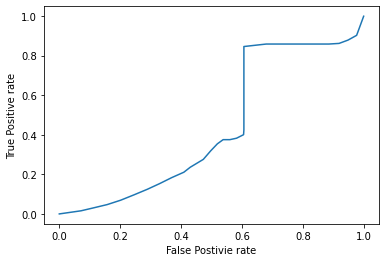

In [42]:
plt.plot(fpr,tpr)
plt.xlabel("False Postivie rate")
plt.ylabel("True Positive rate")
plt.show()

In [43]:
y_pred=[]
threshold = train_scores.max()

for error in test_scores:
    pred_label= classifier.classify(error,threshold)
    y_pred.append(pred_label)


auc_max = roc_auc_score(np.array(test_labels),np.array(y_pred))
print ("auc = " , auc_max)

auc =  0.5


In [44]:
y_pred=[]
threshold = train_scores.max()

for error in test_scores:
    pred_label= classifier.classify(error,threshold)
    y_pred.append(pred_label)


auc_90 = roc_auc_score(np.array(test_labels),np.array(y_pred))
print ("auc = " , auc_90)

auc =  0.5


#Accuracy

In [45]:
y_pred=[]
for error in test_scores:
    pred_label= classifier.classify(error,train_scores.max())
    y_pred.append(pred_label)
TP,FP,TN,FN = classifier.metrics(y_actual,y_pred)
accuracy_max=(TP+TN)/(TP+FP+TN+FN)
recall_max=TP/(TP+FN)
precision_max=TP/(TP+FP)
print(accuracy_max)

0.5


In [46]:
y_pred=[]
for error in test_scores:
    pred_label= classifier.classify(error,0.9*train_scores.max())
    y_pred.append(pred_label)
TP,FP,TN,FN = classifier.metrics(y_actual,y_pred)
accuracy_90=(TP+TN)/(TP+FP+TN+FN)
recall_90=TP/(TP+FN)
precision_90=TP/(TP+FP)
print(accuracy_90)

0.4722222222222222


In [47]:
measures_dict={'thresholds':['threshol_max','thresold 90%'],'Accuracy': [accuracy_max, accuracy_90], 'Precision':[precision_max,precision_90],'Recall': [recall_max, recall_90],'auc':[auc_max,auc_90]}
df_measures=pd.DataFrame(measures_dict)
df_measures.head()
df_measures.to_excel(f"{camera}_Ganomaly_measures_of accuracy.xlsx",sheet_name='Sheet_name_1')  

In [48]:
np.save(f"fpr_ganomaly_{camera}.npy",fpr)
np.save(f"tpr_ganomaly_{camera}.npy",tpr)